In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

In [ ]:
os.chdir('/content/drive/MyDrive/Data/DSCI550 Final Project/data')
os.listdir()

['olist', 'CPI', 'shapefile', 'analysis_middle_dataset']

# 1 Basic Information of Datasets and Missing Values

Due to the number of datasets (.csv files) and their huge amount of sizes, loop through all datasets to get their basic information, especially missing values. This shoule be running for several minutes

In [ ]:
df_wiz_null = {}
df_non_null = {}
df_files = [file for file in os.listdir(os.getcwd() + '/olist')  if file.endswith('.csv')]
for df_name in df_files:
  print(df_name)
  try:
    df = pd.read_csv(f'olist/{df_name}', encoding = 'utf-8')
  except:
    df = pd.read_csv(f'{df_name}', encoding = 'latin-1')
  null_inf = df.isnull().sum()
  if len(null_inf[null_inf > 0]) > 0:
    df_wiz_null[df_name] = null_inf.sort_values()
  else:
    df_non_null[df_name] = null_inf

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_orders_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [ ]:
def format_table_columns(table_columns):
    formatted_str = ""
    for table, series in table_columns.items():
        formatted_str += f"\033[1mTable:\033[0m {table}\n"
        formatted_str += "\033[1mColumns and the Number of Nulls:\033[0m \n"
        for column, null_count in series.items():
            formatted_str += f"  {column}: {null_count}\n"
        formatted_str += "\n"
    return formatted_str

In [ ]:
info_table_wiz_null = format_table_columns(df_wiz_null)
print(info_table_wiz_null)

Table: olist_order_reviews_dataset.csv
Columns and the Number of Nulls: 
  review_id: 0
  order_id: 0
  review_score: 0
  review_creation_date: 0
  review_answer_timestamp: 0
  review_comment_message: 58247
  review_comment_title: 87656

Table: olist_orders_dataset.csv
Columns and the Number of Nulls: 
  order_id: 0
  customer_id: 0
  order_status: 0
  order_purchase_timestamp: 0
  order_estimated_delivery_date: 0
  order_approved_at: 160
  order_delivered_carrier_date: 1783
  order_delivered_customer_date: 2965

Table: olist_products_dataset.csv
Columns and the Number of Nulls: 
  product_id: 0
  product_weight_g: 2
  product_length_cm: 2
  product_height_cm: 2
  product_width_cm: 2
  product_category_name: 610
  product_name_lenght: 610
  product_description_lenght: 610
  product_photos_qty: 610




In [ ]:
info_table_non_null = format_table_columns(df_non_null)
print(info_table_non_null)

Table: olist_customers_dataset.csv
Columns and the Number of Nulls: 
  customer_id: 0
  customer_unique_id: 0
  customer_zip_code_prefix: 0
  customer_city: 0
  customer_state: 0

Table: olist_geolocation_dataset.csv
Columns and the Number of Nulls: 
  geolocation_zip_code_prefix: 0
  geolocation_lat: 0
  geolocation_lng: 0
  geolocation_city: 0
  geolocation_state: 0

Table: olist_order_items_dataset.csv
Columns and the Number of Nulls: 
  order_id: 0
  order_item_id: 0
  product_id: 0
  seller_id: 0
  shipping_limit_date: 0
  price: 0
  freight_value: 0

Table: olist_order_payments_dataset.csv
Columns and the Number of Nulls: 
  order_id: 0
  payment_sequential: 0
  payment_type: 0
  payment_installments: 0
  payment_value: 0

Table: olist_sellers_dataset.csv
Columns and the Number of Nulls: 
  seller_id: 0
  seller_zip_code_prefix: 0
  seller_city: 0
  seller_state: 0

Table: product_category_name_translation.csv
Columns and the Number of Nulls: 
  product_category_name: 0
  product

There are three three tables with missing values, **'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv', and 'olist_products_dataset.csv'**. They are the table of customers' orders, all the products this shopping platform provides, and the reviews of products bought by customers.

In [ ]:
df_order = pd.read_csv('olist/olist_orders_dataset.csv')
df_item = pd.read_csv('olist/olist_order_items_dataset.csv')

In [ ]:
df_wiz_null

{'olist_order_reviews_dataset.csv': review_id                      0
 order_id                       0
 review_score                   0
 review_creation_date           0
 review_answer_timestamp        0
 review_comment_message     58247
 review_comment_title       87656
 dtype: int64,
 'olist_orders_dataset.csv': order_id                            0
 customer_id                         0
 order_status                        0
 order_purchase_timestamp            0
 order_estimated_delivery_date       0
 order_approved_at                 160
 order_delivered_carrier_date     1783
 order_delivered_customer_date    2965
 dtype: int64,
 'olist_products_dataset.csv': product_id                      0
 product_weight_g                2
 product_length_cm               2
 product_height_cm               2
 product_width_cm                2
 product_category_name         610
 product_name_lenght           610
 product_description_lenght    610
 product_photos_qty            610
 dtype: int6

Null values in the order dataset are dates. Also, they are not very important for determining the time placing orders, because there is another variable 'order_purchase_timestamp' to specify the time.

Import other datasets.

In [ ]:
df_item_info = pd.read_csv('olist/olist_products_dataset.csv')
df_item_info

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
df_translation = pd.read_csv('olist/product_category_name_translation.csv')
df_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
df_customers = pd.read_csv('olist/olist_customers_dataset.csv')
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
'''# Possible Users having several customer_id

from_diff_city = []
user_multi_id = df_customers['customer_unique_id'].value_counts()[df_customers['customer_unique_id'].value_counts() > 1].index
for nounq_id in user_multi_id:
  temp = df_customers[df_customers['customer_unique_id'] == nounq_id]
  cities = temp['customer_city'].value_counts()
  if len(cities) > 1:
    from_diff_city.append((nounq_id, dict(zip(cities.index, cities))))'''

"# Possible Users having several customer_id\n\nfrom_diff_city = []\nuser_multi_id = df_customers['customer_unique_id'].value_counts()[df_customers['customer_unique_id'].value_counts() > 1].index\nfor nounq_id in user_multi_id:\n  temp = df_customers[df_customers['customer_unique_id'] == nounq_id]\n  cities = temp['customer_city'].value_counts()\n  if len(cities) > 1:\n    from_diff_city.append((nounq_id, dict(zip(cities.index, cities))))"

In [ ]:
df_customers['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [ ]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df_orders = pd.read_csv('olist/olist_orders_dataset.csv')
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Since so far it is not necessary to fill the nulls in the order table, merge it with the item table to check all the sold items.

In [ ]:
df_order_item = pd.merge(df_order, df_item, how = 'left', on = 'order_id')
df_order_item

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


To further get the names of items for later analysis, join the names of products with the order table.

In [ ]:
df_item_info.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Check the translation of the product category names. Then use a dictionary to map the category names in the item information (product) table into English.

In [ ]:
df_translation = pd.read_csv('olist/product_category_name_translation.csv')
df_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
item_translation = dict([tuple(x) for x in df_translation.itertuples(index = False)])
df_item_info['product_category_name'] = df_item_info['product_category_name'].replace(item_translation)

# 2 Exploration

## 2.0 Location Selection
We only focus on customers in **the great Sao Paulo area** and their consumptions. Use the geolocation_city to select customers and their orders.

In [ ]:
df_locations = pd.read_csv('olist/olist_geolocation_dataset.csv')
df_locations

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


## 2.1 Customers

Find those customers with in the Sao Paulo region.

In [ ]:
SP_customers = df_customers[(df_customers['customer_city'] == 'sao paulo') | (df_customers['customer_city'] == 'são paulo')].copy()
SP_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP
22,2938121a40a20953c43caa8c98787fcb,482441ea6a06b1f72fe9784756c0ea75,5713,sao paulo,SP
...,...,...,...,...,...
99408,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP
99411,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP
99422,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP
99423,c6ece8a5137f3c9c3a3a12302a19a2ac,aaf22868003377e859049dcf5f0b3fdf,1323,sao paulo,SP


## 2.2 Products and Categories

For customers from all the cities, some most purchased categories are

In [ ]:
df_item_info.product_category_name.value_counts()[:10]

bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_category_name, dtype: int64

Merge the translated names with the order-item table.

In [ ]:
df_order_item = df_order_item.merge(right = df_item_info[['product_id', 'product_category_name']], on = 'product_id', how = 'left')

With the table of orders, check the status of orders.

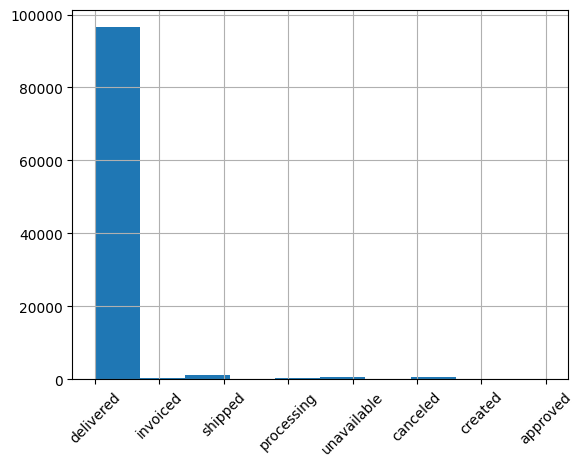

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
df_order['order_status'].hist()
plt.xticks(rotation = 45)
plt.show()
df_order['order_status'].value_counts()

Most items are shipped or delivered which mean successful purchases. 625 orders are canceled. The other status' meanings are unclear. So remove the canceled orders from the records.

In [ ]:
order_id_canceled = list(df_order_item[df_order_item['order_status'] != 'canceled']['order_id'].unique()).copy()
df_order_items_success = df_order_item[df_order_item['order_status'] != 'canceled'].copy()

Find those items bought by customers from Sao Paulo.

In [ ]:
temp_order_item1 = df_order_items_success.merge(SP_customers, how = 'left', on = 'customer_id')
SP_temp_order_item = temp_order_item1[temp_order_item1['customer_unique_id'].notnull()].copy().reset_index()
SP_temp_order_item

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP
1,12,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,1.0,f7e0fa615b386bc9a8b9eb52bc1fff76,87142160b41353c4e5fca2360caf6f92,2017-07-19 20:10:08,98.00,16.13,computers_accessories,782987b81c92239d922aa49d6bd4200b,4278.0,sao paulo,SP
2,14,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,1.0,10adb53d8faa890ca7c2f0cbcb68d777,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-27 17:55:14,19.90,12.80,bed_bath_table,e2dfa3127fedbbca9707b36304996dab,4812.0,sao paulo,SP
3,15,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,1.0,72d3bf1d3a790f8874096fcf860e3eff,0bae85eb84b9fb3bd773911e89288d54,2018-03-07 15:10:47,38.25,16.11,toys,04cf8185c71090d28baa4407b2e6d600,5271.0,sao paulo,SP
4,21,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,1.0,5ac9d9e379c606e36a8094a6046f75dc,633ecdf879b94b5337cca303328e4a25,2017-09-25 04:04:09,109.90,8.96,health_beauty,d699688533772c15a061e8ce81cb56df,4001.0,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,112684,87b4c933f31145a28413b39d880ad6c3,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,2018-03-02 17:12:05,2018-03-02 17:49:24,2018-03-06 21:23:32,2018-03-16 17:21:55,2018-03-21 00:00:00,1.0,cbaf5898b92064cd5e399c7cff291d0a,06a2c3af7b3aee5d69171b0e14f0ee87,2018-03-08 17:31:06,57.99,27.26,health_beauty,490c3c53ca927221bccbb00706afbcf9,2042.0,sao paulo,SP
17778,112689,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,sports_leisure,fb9310710003399b031add3e55f34719,3318.0,sao paulo,SP
17779,112690,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,sports_leisure,fb9310710003399b031add3e55f34719,3318.0,sao paulo,SP
17780,112705,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,delivered,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17 00:00:00,1.0,e71f3cd0a0ef69b7fd173b32322dc6da,520b493b57809f446cb0a233bb3e25c7,2017-11-09 16:30:29,28.00,9.94,housewares,22757c044f096bef19c36c5d6ffc51d5,1308.0,sao paulo,SP


## 2.3 Orders

Use 'order_purchase_timestamp' as the time purchase occurred, convert it into datetime values, then check the counts of orders along day, week and months.

In [ ]:
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order['Year'] = df_order['order_purchase_timestamp'].dt.year.astype(str)
df_order['Month'] = df_order['order_purchase_timestamp'].dt.month.apply(lambda d: '0' + str(d) if d < 10 else str(d))
df_order['Day'] = df_order['order_purchase_timestamp'].dt.day.apply(lambda d: '0' + str(d) if d < 10 else str(d))

By month.

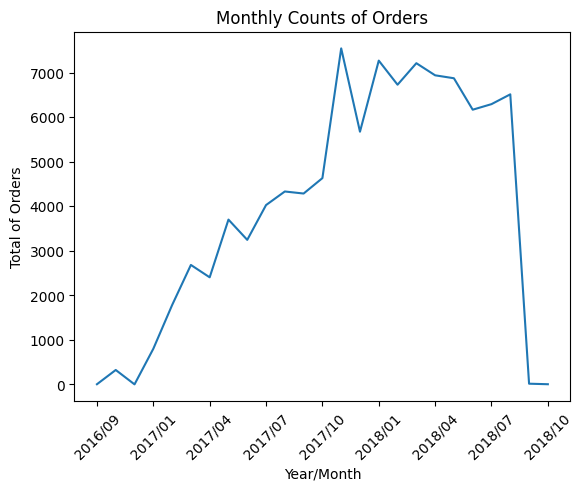

In [ ]:
y_mo_idx = []
y_mo_num = []
for y_mo in df_order.groupby(by = ['Year', 'Month']):
  y_mo_num.append(len(y_mo[1]))
  y_mo_idx.append(y_mo[0][0] + '/' + y_mo[0][1])
y_mo_num_order = pd.Series(y_mo_num, index = y_mo_idx).sort_index()

sns.lineplot(data = y_mo_num_order)
plt.xticks(range(0, len(y_mo_num_order), 3), rotation = 45)
plt.title('Monthly Counts of Orders')
plt.xlabel('Year/Month')
plt.ylabel('Total of Orders')

plt.show()

By day.

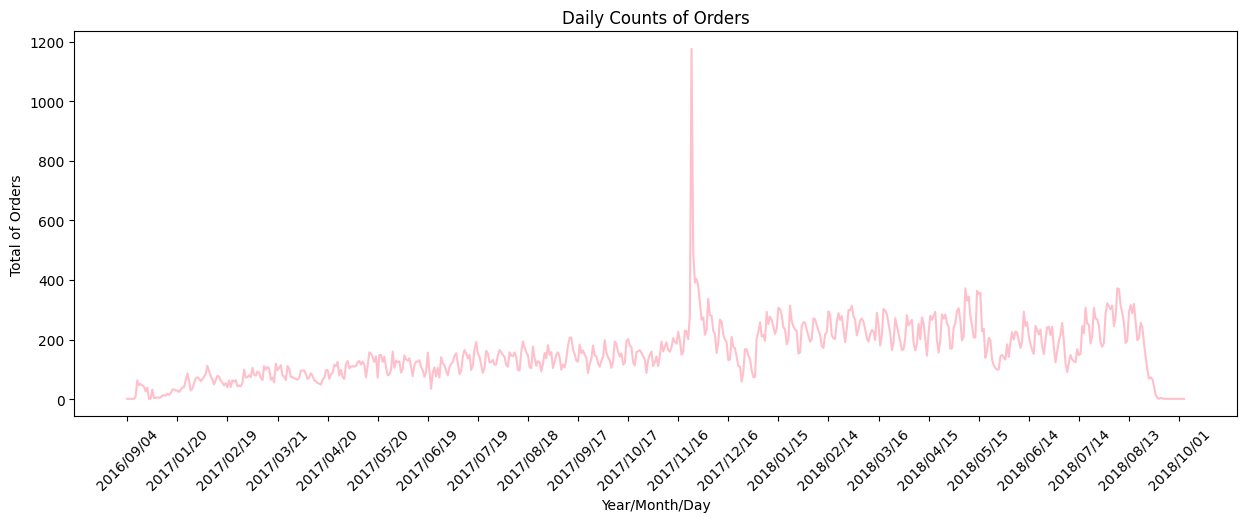

In [ ]:
y_mo_day_idx = []
y_mo_day_num = []
for ymd in df_order.groupby(by = ['Year', 'Month', 'Day']):
  y_mo_day_num.append(len(ymd[1]))
  y_mo_day_idx.append(ymd[0][0] + '/' + ymd[0][1] + '/' + ymd[0][2])
ymd_num_order = pd.Series(y_mo_day_num, index = y_mo_day_idx).sort_index()

plt.figure(figsize = (15, 5))
sns.lineplot(data = ymd_num_order, color = 'pink')
plt.xticks(range(0, len(ymd_num_order), 30), rotation = 45)
plt.title('Daily Counts of Orders')
plt.xlabel('Year/Month/Day')
plt.ylabel('Total of Orders')

plt.show()

By week.

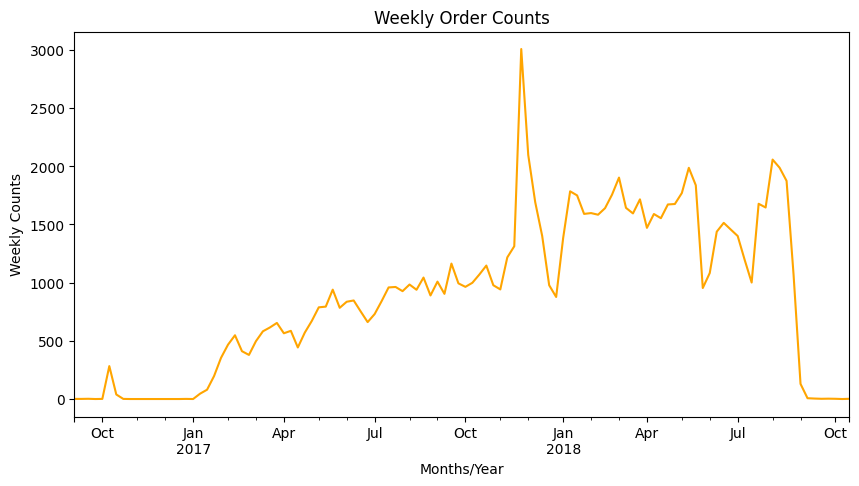

In [ ]:
plt.figure(figsize = (10, 5))
df_order.set_index('order_purchase_timestamp').sort_index().resample('W').size().plot(color = 'orange')
plt.xlabel('Months/Year')
plt.ylabel('Weekly Counts')
plt.title('Weekly Order Counts')
plt.show()

Due to possible devoid of records, the counts on the head and end of the series might not be reliable. However, the overall trend of the series is clear: **the volume of orders gradually rises with occassional fluctuations**. This holds true for daily, weekly and monthly data.

The Average Price per Order

With the daily, weekly and monthly number of orders above, further calculate the average price of order in each unit.

## 2.4 Products in the Orders

Calculate the Max, Min and Average prices of each product (category) that is successfully purchased. Also, calculate these statistcs for each category. Give each item a simple ID to make specifying values faster.

In [ ]:
df_item_info['simple_product_id'] = df_item_info.index
df_item_info[['simple_product_id', 'product_id', 'product_category_name']]

,simple_product_id,product_id,product_category_name
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,3,cef67bcfe19066a932b7673e239eb23d,baby
4,4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


In [ ]:
try:
  df_item['simple_product_id']
except:
  df_item = df_item.merge(df_item_info[['simple_product_id', 'product_id', 'product_category_name']], on = 'product_id', how = 'left').sort_values(by = 'simple_product_id')
  pass


try:
  df_order_items_success['simple_product_id']
except:
  df_order_items_success = df_order_items_success.merge(df_item_info[['simple_product_id', 'product_id']], on = 'product_id', how = 'left').sort_values(by = 'simple_product_id')
  pass
df_order_items_success

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,simple_product_id
40046,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,1.0,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery,0.0
4379,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,1.0,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,art,1.0
50834,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,1.0,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,sports_leisure,2.0
81717,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,1.0,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,baby,3.0
66789,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,1.0,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,housewares,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112386,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112480,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112500,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112619,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_price_info = df_order_items_success.groupby('simple_product_id').agg({'price': ['mean', 'max', 'min', 'sum', 'size']}).copy()
item_price_info.columns = [c[1] + '_price' for c in item_price_info.columns[:-1]] + ['number of purchase']
item_price_info['simple_product_id'] = item_price_info.index.astype(int)
item_price_info = item_price_info.rename_axis(None)
item_price_info = item_price_info.merge(df_item_info[['simple_product_id', 'product_id', 'product_category_name']], on = 'simple_product_id', how = 'left')

In [ ]:
item_price_info

,mean_price,max_price,min_price,sum_price,number of purchase,simple_product_id,product_id,product_category_name
0,10.910000,10.91,10.91,10.91,1,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,248.000000,248.00,248.00,248.00,1,1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,79.800000,79.80,79.80,79.80,1,2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,112.300000,112.30,112.30,112.30,1,3,cef67bcfe19066a932b7673e239eb23d,baby
4,37.900000,37.90,37.90,37.90,1,4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...,...,...,...,...,...,...
32730,69.900000,69.90,69.90,2236.80,32,32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32731,200.000000,240.00,160.00,400.00,2,32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32732,127.300000,127.50,127.00,636.50,5,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32733,32.702857,39.71,29.90,228.92,7,32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


In [ ]:
len(df_item_info)

32951

There are some products never sccessfully purchased, due to the different lengths of two tables.

Then, extract frequent items and itemsets from the orders. They are probably most popular, or lucrative sellers to the business.

Rank the table of item_price_info by number of purchase and the sum price to get popular products.

In [ ]:
item_price_info.sort_values('number of purchase', ascending = False)

,mean_price,max_price,min_price,sum_price,number of purchase,simple_product_id,product_id,product_category_name
13345,71.364137,109.90,69.90,37608.90,527,13430,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor
9601,88.169733,89.90,74.00,42938.66,487,9661,99a4788cb24856965c36a24e339b6058,bed_bath_table
13963,54.911612,59.90,49.00,26577.22,484,14051,422879e10f46682990de24d770e7f83d,garden_tools
30091,54.707647,59.90,49.00,21390.69,391,30293,389d119b48cf3043d311335e499d9c6b,garden_tools
4568,54.270103,59.90,49.00,21056.80,388,4598,368c6c730842d78016ad823897a372db,garden_tools
...,...,...,...,...,...,...,...,...
14040,164.900000,164.90,164.90,164.90,1,14128,f6ebd102f55b1d6ec28eb3cb06c26210,toys
14038,139.900000,139.90,139.90,139.90,1,14126,ab94356394683706626f737b7c135ae1,health_beauty
14033,37.000000,37.00,37.00,37.00,1,14121,75d3f426c010ad14f95a59aaf2e24548,auto
14032,179.490000,179.49,179.49,179.49,1,14120,a104bff7e396a301f5f7ba9f055fa9bc,auto


Quantity sold by each Category.

In [ ]:
n_sales_list = item_price_info.groupby('product_category_name')['number of purchase'].sum().sort_values(ascending = False)
n_sales_list.head(15)

product_category_name
bed_bath_table           11097
health_beauty             9634
sports_leisure            8590
furniture_decor           8298
computers_accessories     7781
housewares                6915
watches_gifts             5970
telephony                 4527
garden_tools              4328
auto                      4205
toys                      4083
cool_stuff                3780
perfumery                 3404
baby                      3045
electronics               2756
Name: number of purchase, dtype: int64

In [ ]:
percent_in_sales = pd.DataFrame()
percent_in_sales['Product Category'] = n_sales_list.head(30).index
percent_in_sales['number sold'] = n_sales_list.head(30).values
percent_in_sales.loc[len(percent_in_sales), :] = ['Other', sum(n_sales_list[len(percent_in_sales) : ])]
percent_in_sales['Percent in Quantity'] = percent_in_sales['number sold']/(percent_in_sales['number sold'].sum())
percent_in_sales

,Product Category,number sold,Percent in Quantity
0,bed_bath_table,11097.0,0.100408
1,health_beauty,9634.0,0.087171
2,sports_leisure,8590.0,0.077724
3,furniture_decor,8298.0,0.075082
4,computers_accessories,7781.0,0.070404
5,housewares,6915.0,0.062568
6,watches_gifts,5970.0,0.054018
7,telephony,4527.0,0.040961
8,garden_tools,4328.0,0.039161
9,auto,4205.0,0.038048


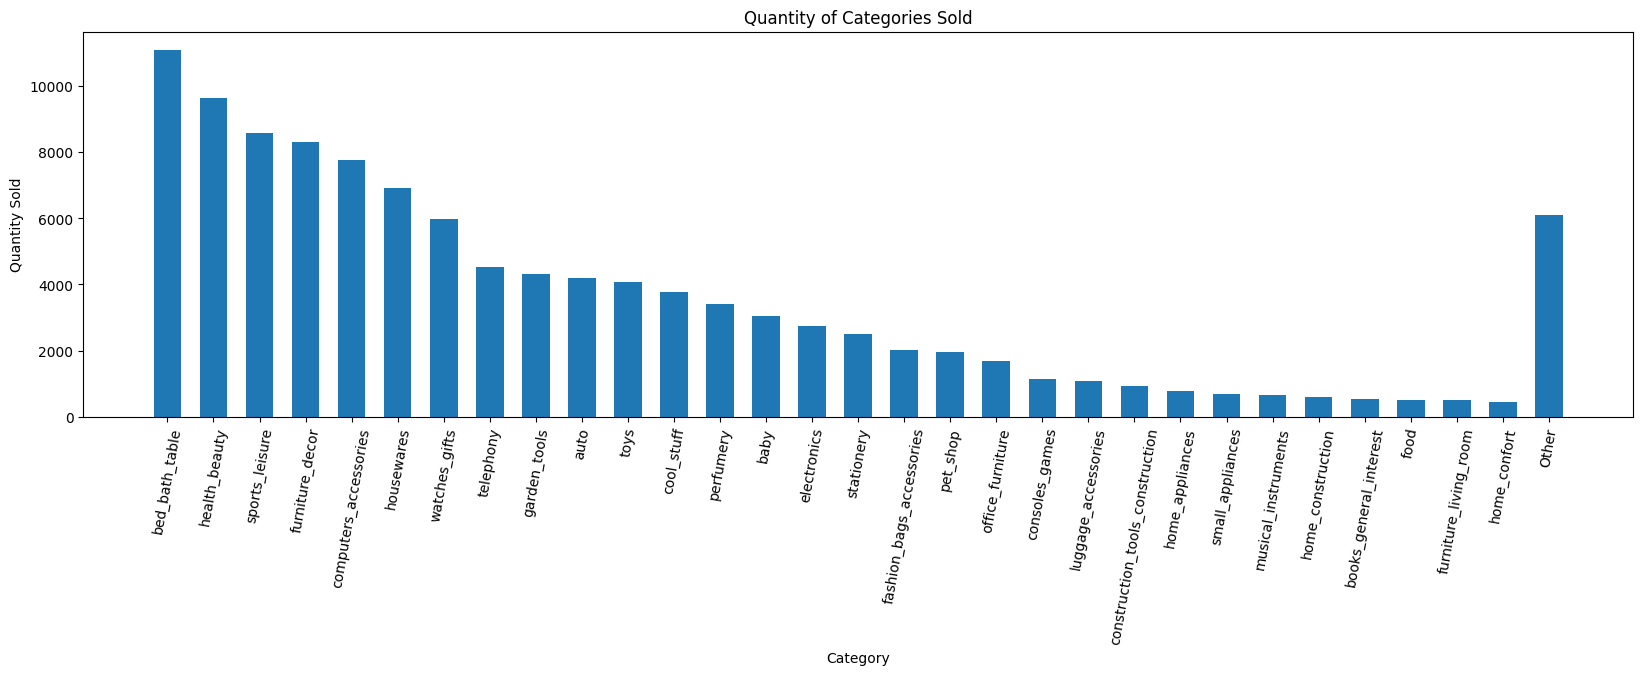

In [ ]:
plt.figure(figsize = (20, 5))
plt.bar(percent_in_sales['Product Category'], percent_in_sales['number sold'], width = .6)
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.title('Quantity of Categories Sold')
plt.xticks(rotation = 80)

plt.show()

Then check the total sales of each category.

In [ ]:
sum_sales_list = item_price_info.groupby('product_category_name')['sum_price'].sum().sort_values(ascending = False)

sum_sales = pd.DataFrame()
sum_sales['Product Category'] = sum_sales_list.head(30).index
sum_sales['Total Sales'] = sum_sales_list.head(30).values
sum_sales.loc[len(sum_sales), :] = ['Other', sum(sum_sales_list[len(sum_sales) : ])]
sum_sales

,Product Category,Total Sales
0,health_beauty,1255695.13
1,watches_gifts,1198185.21
2,bed_bath_table,1035964.06
3,sports_leisure,979740.92
4,computers_accessories,904322.02
5,furniture_decor,727465.05
6,housewares,626825.80
7,cool_stuff,620835.39
8,auto,586620.73
9,garden_tools,481009.94


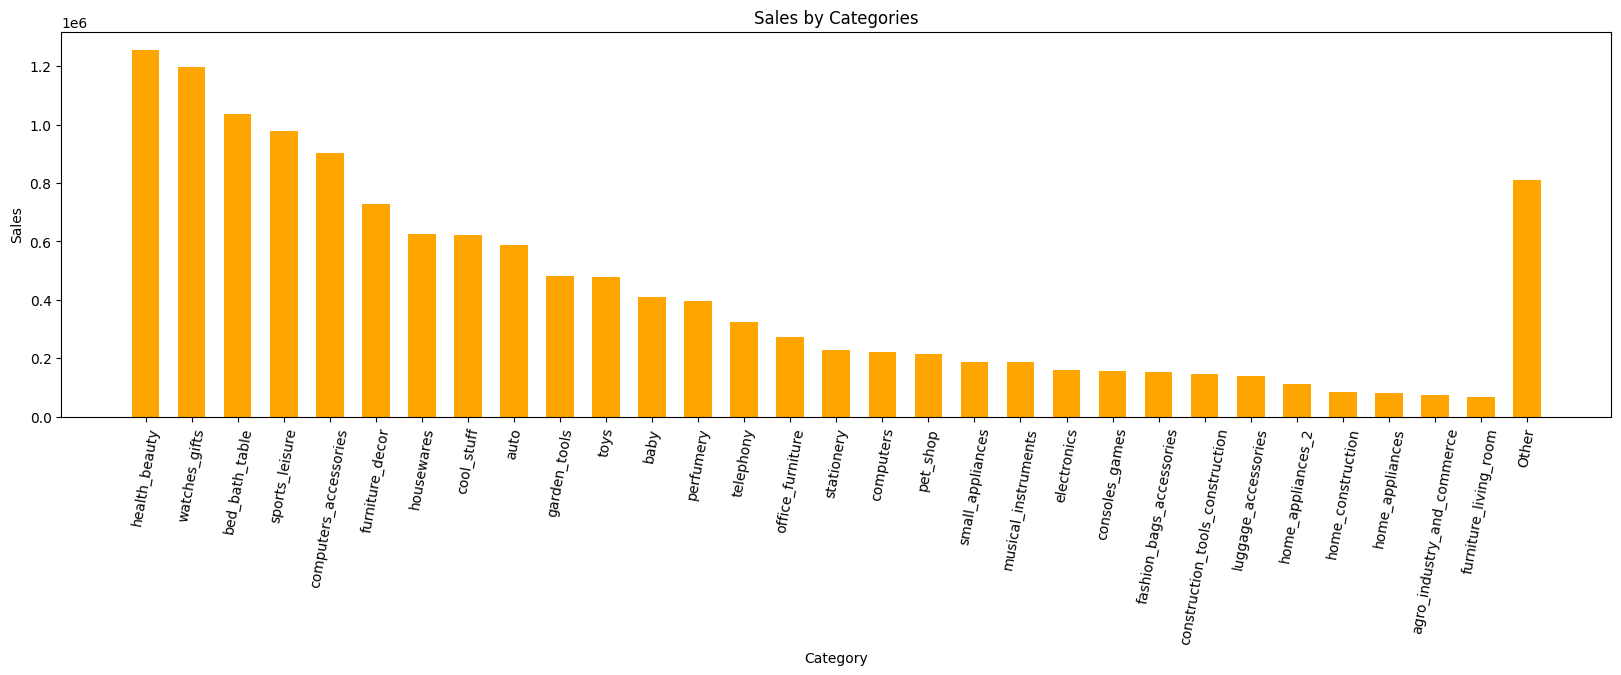

In [ ]:
plt.figure(figsize = (20, 5))
plt.bar(sum_sales['Product Category'], sum_sales['Total Sales'], width = .6, color = 'orange')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales by Categories')
plt.xticks(rotation = 80)

plt.show()

Are the quantities and (weighted) average price stationary all the time? Use a sliding window with a time span of 180 days and a 2 months' sliding step, and calculate the average price and quantities.

In [ ]:
df_order_items_success['order_purchase_timestamp'] = pd.to_datetime(df_order_items_success['order_purchase_timestamp'])
df_order_items_success['order_purchase_day'] = pd.to_datetime(df_order_items_success['order_purchase_timestamp'].dt.date)

wind_starts = pd.date_range(start = df_order_items_success['order_purchase_day'].min(),
                            end = df_order_items_success['order_purchase_day'].max(), freq = '2M')
wind_starts

DatetimeIndex(['2016-09-30', '2016-11-30', '2017-01-31', '2017-03-31',
               '2017-05-31', '2017-07-31', '2017-09-30', '2017-11-30',
               '2018-01-31', '2018-03-31', '2018-05-31', '2018-07-31'],
              dtype='datetime64[ns]', freq='2M')

In [ ]:
def extract_between_days(start, day, table):
  t_temp = table[(table['order_purchase_day'] >= start) & (table['order_purchase_day'] < start + pd.Timedelta(days = day))]\
        .groupby('product_id')

  p_mean = t_temp['price'].mean()
  p_num = t_temp['price'].nunique().values
  p_id = p_mean.index
  sales = t_temp.size()
  return p_mean.values, p_num, p_mean.index, sales.values

In [ ]:
price_by_6m = pd.DataFrame(columns = ['product_id', 'mean price', 'number of price', 'N sales', 'start', 'end', '6m interval'])

itv = 0
for d0 in wind_starts:
  p_mean, p_num, p_id, s= extract_between_days(d0, 180, df_order_items_success)
  d1 = d0 + pd.Timedelta(days = 179)
  idx_range = range(len(price_by_6m), len(price_by_6m) + len(p_id))
  price_by_6m = price_by_6m.reindex(range(0, len(price_by_6m) + len(p_id)))
  price_by_6m.loc[idx_range, 'product_id'] = p_id
  price_by_6m.loc[idx_range, 'mean price'] = p_mean
  price_by_6m.loc[idx_range, 'number of price'] = p_num
  price_by_6m.loc[idx_range, 'N sales'] = s
  price_by_6m.loc[idx_range, 'start'] = d0
  price_by_6m.loc[idx_range, 'end'] = d1
  price_by_6m.loc[idx_range, '6m interval'] = itv
  itv += 1

price_by_6m

,product_id,mean price,number of price,N sales,start,end,6m interval
0,001b72dfd63e9833e8c02742adf472e3,34.99,1,4,2016-09-30 00:00:00,2017-03-28 00:00:00,0
1,001c5d71ac6ad696d22315953758fa04,79.9,1,1,2016-09-30 00:00:00,2017-03-28 00:00:00,0
2,00250175f79f584c14ab5cecd80553cd,54.99,1,1,2016-09-30 00:00:00,2017-03-28 00:00:00,0
3,0036bb031e69d915cd384d1b3838b5d3,35.99,1,1,2016-09-30 00:00:00,2017-03-28 00:00:00,0
4,00636f9286f69c9f1bdabe76e670fb50,27.9,1,2,2016-09-30 00:00:00,2017-03-28 00:00:00,0
...,...,...,...,...,...,...,...
126362,ffc9caf33e2d1e9f44e3e06da19085f7,219.89,1,1,2018-07-31 00:00:00,2019-01-26 00:00:00,11
126363,ffd4bf4306745865e5692f69bd237893,29.99,1,1,2018-07-31 00:00:00,2019-01-26 00:00:00,11
126364,ffd9ac56db9194a413298faaa03cd176,89.0,1,1,2018-07-31 00:00:00,2019-01-26 00:00:00,11
126365,ffedbd68fa6f44e788ff6c2db8094715,40.0,1,2,2018-07-31 00:00:00,2019-01-26 00:00:00,11


Choose popular items to check their prices and sales change.

In [ ]:
pop_item_id = df_order_items_success.groupby('product_id').size().sort_values(ascending = False).index[0:10]

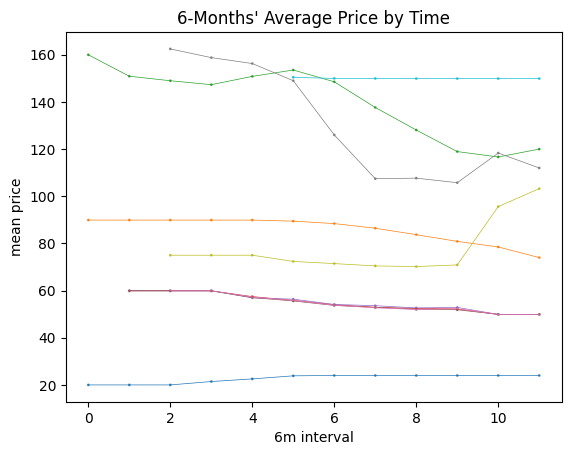

In [ ]:
sns.lineplot(data = price_by_6m[[True if id_ in pop_item_id else False for id_ in price_by_6m['product_id']]],
             x = '6m interval', y = 'mean price', hue = 'product_id', legend = False, lw = .5)
sns.scatterplot(data = price_by_6m[[True if id_ in pop_item_id else False for id_ in price_by_6m['product_id']]],
             x = '6m interval', y = 'mean price', hue = 'product_id', legend = False, s = 4)
plt.title('6-Months\' Average Price by Time')
plt.show()

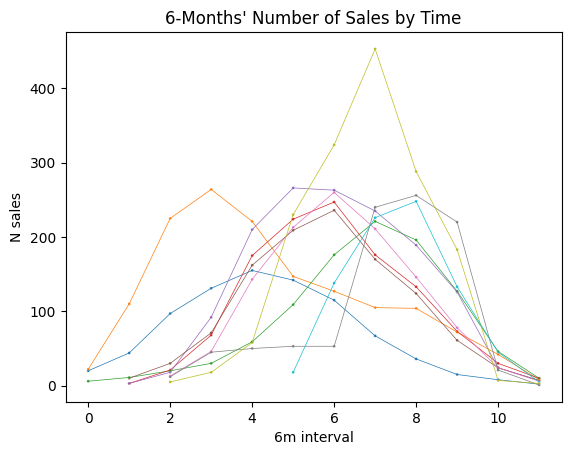

In [ ]:
sns.lineplot(data = price_by_6m[[True if id_ in pop_item_id else False for id_ in price_by_6m['product_id']]],
             x = '6m interval', y = 'N sales', hue = 'product_id', legend = False, lw = .5)
sns.scatterplot(data = price_by_6m[[True if id_ in pop_item_id else False for id_ in price_by_6m['product_id']]],
             x = '6m interval', y = 'N sales', hue = 'product_id', legend = False, s = 4)

plt.title('6-Months\' Number of Sales by Time')
plt.show()

How about the change within each category. Append the categories of products to the 6 months' table.

In [ ]:
price_by_6m = price_by_6m.merge(df_item_info[['product_id', 'product_category_name']], on = 'product_id', how = 'left')
price_by_6m

,product_id,mean price,number of price,N sales,start,end,6m interval,product_category_name
0,001b72dfd63e9833e8c02742adf472e3,34.99,1,4,2016-09-30 00:00:00,2017-03-28 00:00:00,0,furniture_decor
1,001c5d71ac6ad696d22315953758fa04,79.9,1,1,2016-09-30 00:00:00,2017-03-28 00:00:00,0,bed_bath_table
2,00250175f79f584c14ab5cecd80553cd,54.99,1,1,2016-09-30 00:00:00,2017-03-28 00:00:00,0,housewares
3,0036bb031e69d915cd384d1b3838b5d3,35.99,1,1,2016-09-30 00:00:00,2017-03-28 00:00:00,0,garden_tools
4,00636f9286f69c9f1bdabe76e670fb50,27.9,1,2,2016-09-30 00:00:00,2017-03-28 00:00:00,0,furniture_decor
...,...,...,...,...,...,...,...,...
126362,ffc9caf33e2d1e9f44e3e06da19085f7,219.89,1,1,2018-07-31 00:00:00,2019-01-26 00:00:00,11,health_beauty
126363,ffd4bf4306745865e5692f69bd237893,29.99,1,1,2018-07-31 00:00:00,2019-01-26 00:00:00,11,fashion_bags_accessories
126364,ffd9ac56db9194a413298faaa03cd176,89.0,1,1,2018-07-31 00:00:00,2019-01-26 00:00:00,11,pet_shop
126365,ffedbd68fa6f44e788ff6c2db8094715,40.0,1,2,2018-07-31 00:00:00,2019-01-26 00:00:00,11,books_technical


Show the sales change of categories with top 10 sales by time.

Text(0.5, 1.0, "Number of Items Sold in 6-months' Intervals by Category")

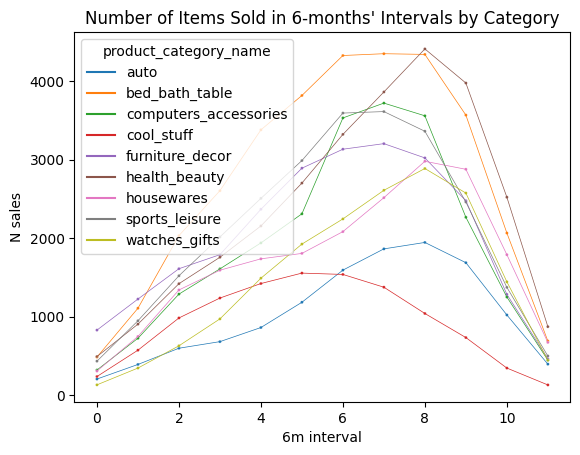

In [ ]:
category_sale_6m = price_by_6m.groupby(['product_category_name', '6m interval'])[['N sales']].sum().reset_index()

sns.lineplot(data = category_sale_6m[[True if cat in sum_sales.sort_values(by = 'Total Sales', ascending = False)['Product Category'].head(10).values else False\
                    for cat in category_sale_6m['product_category_name']]], x = '6m interval', y = 'N sales', hue = 'product_category_name', lw = .5)

sns.scatterplot(data = category_sale_6m[[True if cat in sum_sales.sort_values(by = 'Total Sales', ascending = False)['Product Category'].head(10).values else False\
                    for cat in category_sale_6m['product_category_name']]], x = '6m interval', y = 'N sales',
             hue = 'product_category_name', s = 4.5, legend = False)
plt.title('Number of Items Sold in 6-months\' Intervals by Category')

Then show the sales of top 10 categories with highest mean prices.




<Axes: xlabel='6m interval', ylabel='N sales'>

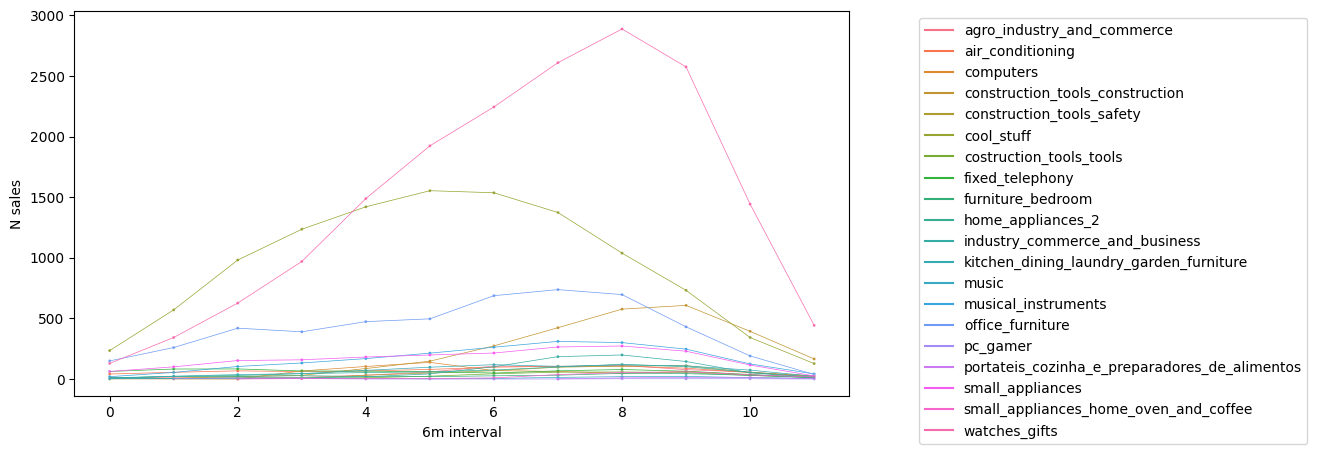

In [ ]:
category_sale_6m = price_by_6m.groupby(['product_category_name', '6m interval'])[['N sales']].sum().reset_index()
top_10_expensive = df_order_items_success.groupby('product_category_name')[['price']].mean().sort_values('price', ascending = False).head(20).index

plt.figure(figsize = (10, 5))
ax = sns.lineplot(data = category_sale_6m[[True if cat in top_10_expensive else False\
                    for cat in category_sale_6m['product_category_name']]], x = '6m interval', y = 'N sales', hue = 'product_category_name', lw = .5)
ax.legend(bbox_to_anchor=(1.6, 1))

sns.scatterplot(data = category_sale_6m[[True if cat in top_10_expensive else False\
                    for cat in category_sale_6m['product_category_name']]], x = '6m interval', y = 'N sales',
             hue = 'product_category_name', s = 4.5, legend = False)


In [ ]:
df_order_item[df_order_item['product_category_name'] == 'watches_gifts']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
30,91b2a010e1e45e6ba3d133fa997597be,cce89a605105b148387c52e286ac8335,delivered,2018-05-02 11:45:38,2018-05-03 12:55:01,2018-05-10 16:16:00,2018-05-16 20:56:24,2018-05-23 00:00:00,1.0,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,2018-05-09 12:55:01,178.99,13.69,watches_gifts
56,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,2017-12-15 00:14:55,2017-12-19 01:58:00,2018-01-03 15:09:32,2018-01-16 00:00:00,1.0,60184212dae4e6b0da32bf54271a8c4a,b33e7c55446eabf8fe1a42d037ac7d6d,2017-12-21 00:14:55,369.00,17.33,watches_gifts
91,634e8f4c0f6744a626f77f39770ac6aa,05e996469a2bf9559c7122b87e156724,delivered,2017-08-09 18:32:47,2017-08-09 18:45:18,2017-08-10 20:21:53,2017-08-16 18:17:54,2017-08-31 00:00:00,1.0,69d980b4120a76616d7b237d731d6156,744dac408745240a2c2528fb1b6028f3,2017-08-15 18:45:18,219.00,15.28,watches_gifts
92,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30 00:00:00,1.0,c3ba4e8d3cb30049213b682e751e9d00,6560211a19b47992c3666cc44a7e94c0,2018-08-30 04:10:18,93.00,7.91,watches_gifts
93,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30 00:00:00,2.0,c3ba4e8d3cb30049213b682e751e9d00,6560211a19b47992c3666cc44a7e94c0,2018-08-30 04:10:18,93.00,7.91,watches_gifts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113372,33baefa752f2d98a008d4330d306d3db,8b764335e86e1a8f8d3db9f119e03a79,delivered,2017-04-23 14:47:39,2017-04-25 08:11:27,2017-04-25 13:24:03,2017-05-05 13:26:31,2017-05-15 00:00:00,1.0,4a9947ec1fcec2b3321193ed5590e8cb,6560211a19b47992c3666cc44a7e94c0,2017-05-02 08:10:57,59.00,14.17,watches_gifts
113380,226dda5620db063cd962833766480273,b3e43e654b4d35baf3840feca1135f85,delivered,2017-07-18 12:42:28,2017-07-18 12:55:16,2017-07-19 16:44:48,2017-07-28 18:55:50,2017-08-11 00:00:00,1.0,f6d9b167294712de476f696ad722ae73,86ccac0b835037332a596a33b6949ee1,2017-07-24 12:55:16,26.90,16.79,watches_gifts
113382,add4f182072426430ee6c993eab97efe,b87639f5efd3e2316dca5dec5e2f88f4,delivered,2018-01-24 02:23:00,2018-01-25 02:58:03,2018-01-26 19:26:24,2018-01-29 23:33:51,2018-02-08 00:00:00,1.0,e68ede48908dfec1ba4abbcdb86b420f,fa1c13f2614d7b5c4749cbc52fecda94,2018-01-31 02:58:03,369.90,10.78,watches_gifts
113393,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,delivered,2017-11-26 19:42:22,2017-11-26 19:53:48,2017-11-27 18:33:24,2017-12-05 18:38:40,2017-12-15 00:00:00,1.0,526f833e1eb0a32ad9351145a761b9ab,6560211a19b47992c3666cc44a7e94c0,2017-11-30 19:53:48,129.00,12.40,watches_gifts


According to the graph, the sales change by time among popular and expensive products are not significantly different. They have pretty much similar patterns.

## 2.5 CPI
Check the CPI of Brazil.

In [ ]:
df_CPI = pd.read_csv('CPI/CPI_world.csv')

<ipython-input-51-e5b7d9deeaab>:1: DtypeWarning: Columns (311) have mixed types. Specify dtype option on import or set low_memory=False.
  df_CPI = pd.read_csv('CPI/CPI_world.csv')


In [ ]:
brazil_cpi = df_CPI[df_CPI['Country Name'] == 'Brazil']
brazil_cpi

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000,2000M1,2000M2,2000M3,2000M4,...,2023M1,2023M2,2023M3,2023M4,2023M5,2023M6,2023M7,2023M8,Common Reference Period,Unnamed: 313
0,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_PP_PT,Value,7.04414105947266,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_PP_PT,Value,NaN,0.620058417686467,0.130129316007778,0.219932645627275,0.420196881565577,...,0.529958650559376,0.839991395734744,0.710033566608315,0.610015326029888,0.229925157782192,-0.0799666330596753,0.119970870652179,0.230056059292677,NaN,NaN
2,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_CP_A_PT,Value,7.04414105947266,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_CP_A_PT,Value,NaN,8.85311323131823,7.86208662717428,6.92330766923307,6.77471744390309,...,5.77449704132394,5.59640496585812,4.65077985348159,4.18478805805529,3.935829143848,3.16147370214611,3.99238921077051,4.60817014589434,NaN,NaN
4,Brazil,223,Clothing and footwear,PCPIA_IX,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993M12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,Brazil,223,"Miscellaneous goods and services, Percentage c...",PCPIO_PC_PP_PT,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9021,Brazil,223,"Furnishings, household equipment and routine h...",PCPIHO_PC_PP_PT,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9022,Brazil,223,"Furnishings, household equipment and routine h...",PCPIHO_PC_PP_PT,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9023,Brazil,223,"Transport, Percentage change, Previous period",PCPIT_PC_PP_PT,Value,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the field 'Indicator Name', select all items CPI.

In [ ]:
brazil_cpi['Indicator Name'].unique()

array(['Consumer Price Index, All items, Percentage change, Previous period',
       'Consumer Price Index, All items, Percentage change, Previous year',
       'Clothing and footwear', 'Restaurants and hotels', 'Education',
       'Recreation and culture',
       'Housing, Water, Electricity, Gas and Other Fuels',
       'Consumer Price Index, All items',
       'Alcoholic Beverages, Tobacco, and Narcotics',
       'Food and non-alcoholic beverages', 'Communication', 'Transport',
       'Health',
       'Furnishings, household equipment and routine household maintenance',
       'Miscellaneous goods and services',
       'Health, Percentage change, Previous period',
       'Communication, Percentage change, Previous year',
       'Recreation and culture, Percentage change, Previous year',
       'Education, Percentage change, Previous period',
       'Recreation and culture, Percentage change, Previous period',
       'Clothing and footwear, Percentage change, Previous period',
      

In [ ]:
brazil_cpi[brazil_cpi['Indicator Name'] == 'Consumer Price Index, All items, Percentage change, Previous period']

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000,2000M1,2000M2,2000M3,2000M4,...,2023M1,2023M2,2023M3,2023M4,2023M5,2023M6,2023M7,2023M8,Common Reference Period,Unnamed: 313
0,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_PP_PT,Value,7.04414105947266,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_PP_PT,Value,NaN,0.620058417686467,0.130129316007778,0.219932645627275,0.420196881565577,...,0.529958650559376,0.839991395734744,0.710033566608315,0.610015326029888,0.229925157782192,-0.0799666330596753,0.119970870652179,0.230056059292677,NaN,NaN


In [ ]:
brazil_cpi[(brazil_cpi['Indicator Name'] == 'Consumer Price Index, All items, Percentage change, Previous year') & brazil_cpi['2000M1'].notnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000,2000M1,2000M2,2000M3,2000M4,...,2023M1,2023M2,2023M3,2023M4,2023M5,2023M6,2023M7,2023M8,Common Reference Period,Unnamed: 313
3,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_CP_A_PT,Value,NaN,8.85311323131823,7.86208662717428,6.92330766923307,6.77471744390309,...,5.77449704132394,5.59640496585812,4.65077985348159,4.18478805805529,3.935829143848,3.16147370214611,3.99238921077051,4.60817014589434,NaN,NaN


There are two kinds of CPI records but the trends by time behind are quite the same. Convert the column names into dates of 'Year-Month' then plot the CIP indices from 2016 to 2018.

In [ ]:
cpi_1618_col = [str(j) + f'M{i}' for j in range(2016, 2019) for i in range(1, 13)]
braz_cpi_1618 = brazil_cpi[(brazil_cpi['Indicator Name'] == 'Consumer Price Index, All items, Percentage change, Previous year') & brazil_cpi['2000M1'].notnull()][cpi_1618_col].values
braz_cpi_1618

array([['10.7058050703129', '10.3558843748348', '9.38637237086206',
        '9.27779439789504', '9.32118973015945', '8.84374731752811',
        '8.73577105491906', '8.97449760160124', '8.47596862328723',
        '7.87367083148923', '6.98738329831815', '6.28798821322139',
        '5.35401507176562', '4.75890729616351', '4.57110511568189',
        '4.08251689462281', '3.59725617777094', '2.99855699240557',
        '2.71162576680612', '2.45590849402754', '2.53769093329227',
        '2.70132088889638', '2.8037854253563', '2.94742132043471',
        '2.85511645128654', '2.84489372451748', '2.68080278906359',
        '2.76279709388541', '2.85501330674049', '4.39110397390873',
        '4.48484373032306', '4.19301596721252', '4.52597601644164',
        '4.55702944942381', '4.04603139581444', '3.74558117019155']],
      dtype=object)

<ipython-input-57-d74d51244cce>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


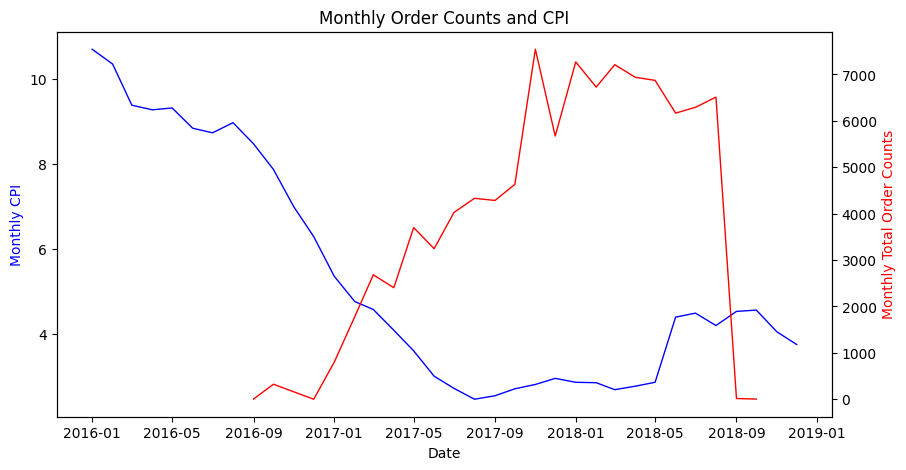

In [ ]:
ymo_1618 = [pd.to_datetime(f'{j}-{i}') for j in range(2016, 2019) for i in range(1, 13)]
df_brazcpi_1618 = pd.DataFrame(data = braz_cpi_1618[0], index = ymo_1618, columns = ['CPI']).astype(float)

fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(df_brazcpi_1618.index, df_brazcpi_1618.CPI.values,
         color = 'b', label = 'CPI', linewidth = 1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly CPI', color = 'b')

ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(y_mo_num_order.index), y_mo_num_order.values,
         color = 'r', label = 'Order Counts', linewidth = 1)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

ax2.set_ylabel('Monthly Total Order Counts', color='r')
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]

plt.title('Monthly Order Counts and CPI')

plt.show()


In [ ]:
y_mo_num_order.index

Index(['2016/09', '2016/10', '2016/12', '2017/01', '2017/02', '2017/03',
       '2017/04', '2017/05', '2017/06', '2017/07', '2017/08', '2017/09',
       '2017/10', '2017/11', '2017/12', '2018/01', '2018/02', '2018/03',
       '2018/04', '2018/05', '2018/06', '2018/07', '2018/08', '2018/09',
       '2018/10'],
      dtype='object')

## 2.5 Payment Types

When the overall level of price is different, people might use different ways to pay for their items. Match orders their transactions methods and visualize the counts of each methods by time.

In [ ]:
df_pay = pd.read_csv('olist/olist_order_payments_dataset.csv')
df_pay

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df_pay['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
df_pay['payment_sequential'].unique()


array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

<Axes: >

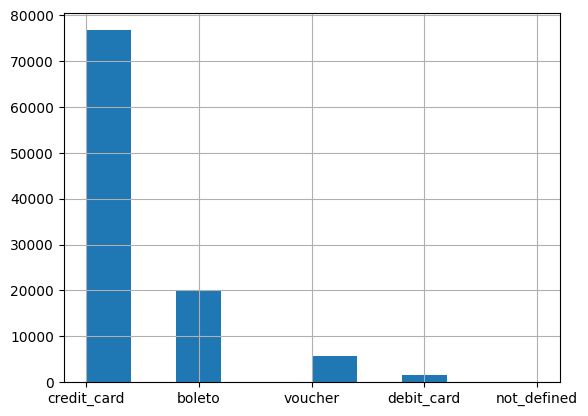

In [ ]:
df_pay['payment_type'].hist()

Most payments were made by credit card, then boleto, a shirt-term check with several days' due. Also, check the values in the column of the installments.

In [ ]:
df_pay.groupby('order_id')['payment_installments'].nunique().unique()

array([1, 2, 3])

There are at most three kinds of installments in an order. For each type of payment, how many kinds of installments do they have?

In [ ]:
pay_methods = df_pay.groupby('payment_type')['payment_installments'].max().index
df_pay.groupby('payment_type')['payment_installments'].max()

payment_type
boleto          1
credit_card    24
debit_card      1
not_defined     1
voucher         1
Name: payment_installments, dtype: int64

In [ ]:
df_pay.groupby('payment_type')['payment_installments'].min()


payment_type
boleto         1
credit_card    0
debit_card     1
not_defined    1
voucher        1
Name: payment_installments, dtype: int64

In [ ]:
df_pay.groupby('payment_type')['payment_installments'].nunique()

payment_type
boleto          1
credit_card    24
debit_card      1
not_defined     1
voucher         1
Name: payment_installments, dtype: int64

For boleto, debit card and those not defined, there is only one installment value: 1, and there are 24 kinds of installments for credit card, from 0 to 24.

Create a pivot table of the payments to record the percentage of value paid by each method in these orders.

In [ ]:
df_pay_pivot = df_pay.pivot_table(index = 'order_id', columns = ['payment_type'],
                                  values = 'payment_value', aggfunc = 'sum', fill_value = 0).reset_index()
df_pay_pivot

payment_type,order_id,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,0.00,72.19,0.0,0,0.0
1,00018f77f2f0320c557190d7a144bdd3,0.00,259.83,0.0,0,0.0
2,000229ec398224ef6ca0657da4fc703e,0.00,216.87,0.0,0,0.0
3,00024acbcdf0a6daa1e931b038114c75,0.00,25.78,0.0,0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.00,218.04,0.0,0,0.0
...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,0.00,0.0,0,0.0
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,0.00,0.0,0,0.0
99437,fffce4705a9662cd70adb13d4a31832d,0.00,116.85,0.0,0,0.0
99438,fffe18544ffabc95dfada21779c9644f,0.00,64.71,0.0,0,0.0


First, visualize the number of orders and values covered by using each each payment method by month.

In [ ]:
df_order_pay = df_pay.merge(df_order, on = 'order_id', how = 'left')
df_order_pay = df_order_pay[df_order_pay['order_status'] != 'canceled'].reset_index(drop = True)

Text(0, 0.5, 'Counts')

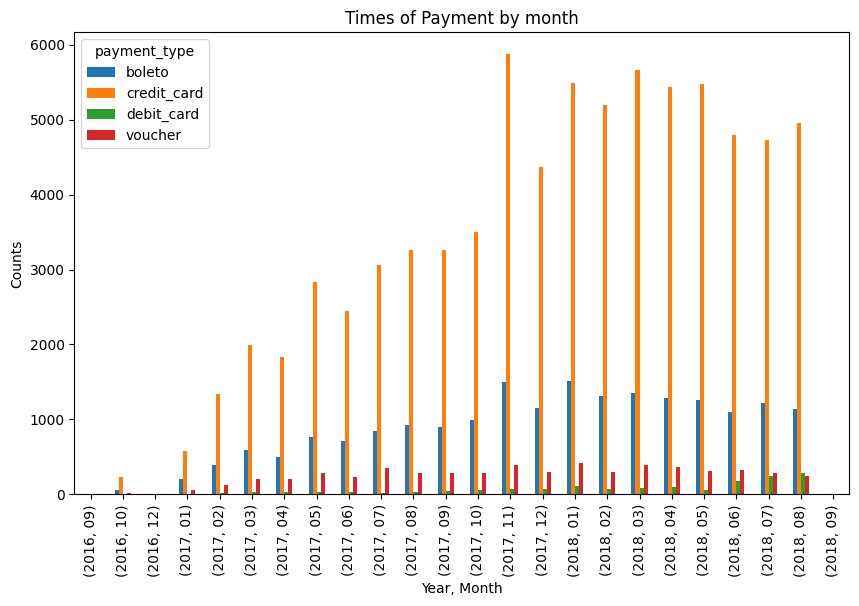

In [ ]:
monthly_pay_count = df_order_pay.groupby(['Year', 'Month', 'payment_type']).size().unstack().fillna(0)
monthly_pay_count.plot(kind = 'bar', figsize=(10, 6))
plt.title('Times of Payment by month')
plt.xlabel('Year, Month')
plt.ylabel('Counts')

It is still hard to summarize pattern. Then find the percentage of orders using each method in the total volume. Plot the CPI together.




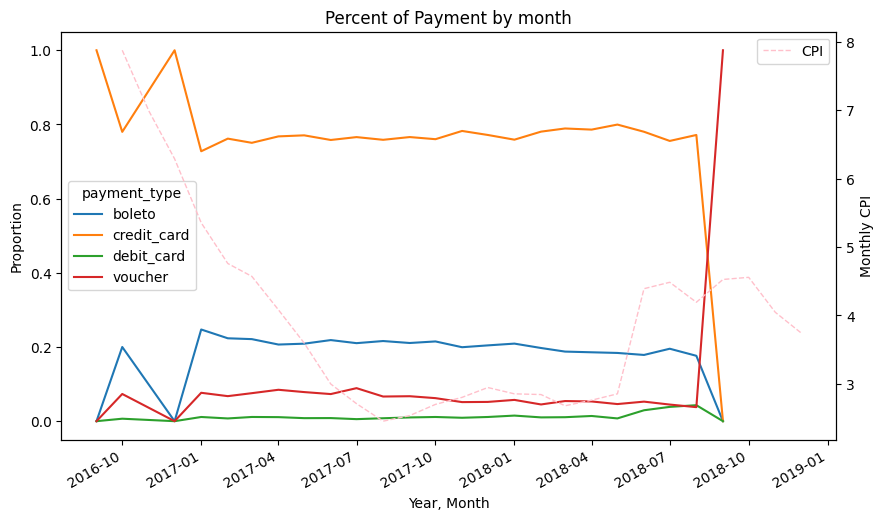

In [ ]:
monthly_order_counts = df_order_pay.groupby(pd.Grouper(key = 'order_purchase_timestamp', freq = 'M'))['order_id'].nunique()
monthly_order_counts = monthly_order_counts[monthly_order_counts != 0]
monthly_pay_percent = df_order_pay.groupby([pd.Grouper(key = 'order_purchase_timestamp', freq = 'M'), 'payment_type']).size().\
                      unstack().fillna(0).apply(lambda col: col/monthly_order_counts.values, axis = 0)
monthly_pay_percent.index = monthly_pay_percent.index.to_period('M').to_timestamp()

fig, ax1 = plt.subplots(figsize = (10, 5))

monthly_pay_percent.plot(kind = 'line', figsize=(10, 6), ax = ax1)
plt.title('Percent of Payment by month')
ax1.set_xlabel('Year, Month')
ax1.set_ylabel('Proportion')

ax2 = ax1.twinx()
cpi_, = ax2.plot(df_brazcpi_1618.index[9:], df_brazcpi_1618.CPI.values[9:],
         color = 'pink', label = 'CPI', linewidth = 1, )
cpi_.set_linestyle('--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly CPI')

plt.legend()
plt.show()

Looks like there is a decrease in credit card uses when CPI decreases. However, the amount of credit card uses are stable when CPI keeps decreasing.

Then, find the monthly percentage of value paid by each method. It equals to **'values paid by a method'/'total sales value'**.

In [ ]:
df_order_success = df_order_items_success.groupby('order_id')['price'].sum().reset_index().rename(columns = {'price': 'total_price'}).copy()
df_order_success = pd.merge(df_order_success, df_order, on = 'order_id', how = 'left')
df_order_success

,order_id,total_price,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,Day
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017,09,13
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017,04,26
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018,01,14
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018,08,08
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017,02,04
...,...,...,...,...,...,...,...,...,...,...,...,...
98811,fffc94f6ce00a00581880bf54a75a037,299.99,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,2018,04,23
98812,fffcd46ef2263f404302a634eb57f7eb,350.00,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,2018,07,14
98813,fffce4705a9662cd70adb13d4a31832d,99.90,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,2017,10,23
98814,fffe18544ffabc95dfada21779c9644f,55.99,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,2017,08,14


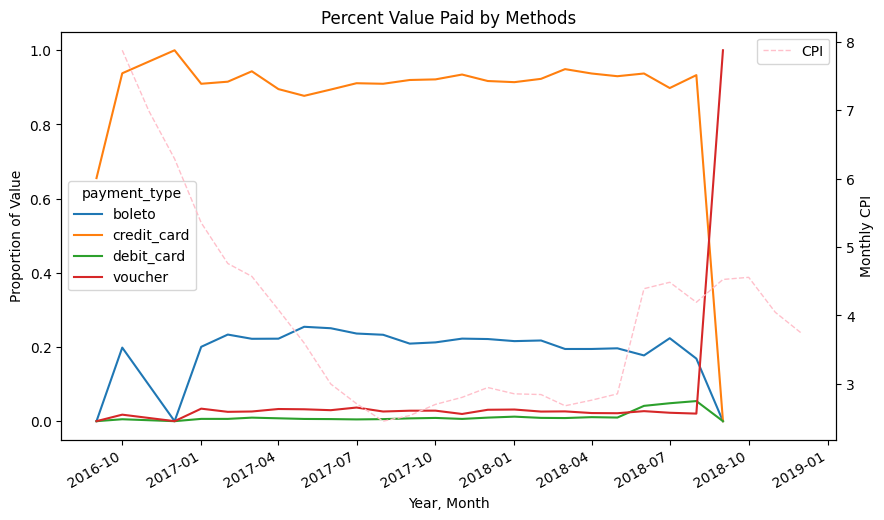

In [ ]:
monthly_sales_value = df_order_success.groupby(pd.Grouper(key = 'order_purchase_timestamp', freq = 'M'))['total_price'].sum()
monthly_sales_value = monthly_sales_value[monthly_sales_value != 0]
monthly_payval_percent = df_order_pay.groupby([pd.Grouper(key = 'order_purchase_timestamp', freq = 'M'), 'payment_type'])['payment_value'].sum().\
                      unstack().fillna(0).apply(lambda col: col/monthly_sales_value.values, axis = 0)
monthly_payval_percent.index = monthly_payval_percent.index.to_period('M').to_timestamp()
monthly_payval_percent[monthly_payval_percent > 1] = 1

fig, ax1 = plt.subplots(figsize = (10, 5))

monthly_payval_percent.plot(kind = 'line', figsize=(10, 6), ax = ax1)
ax1.set_xlabel('Year, Month')
ax1.set_ylabel('Proportion of Value')

ax2 = ax1.twinx()
cpi_, = ax2.plot(df_brazcpi_1618.index[9:], df_brazcpi_1618.CPI.values[9:],
         color = 'pink', label = 'CPI', linewidth = 1, )
cpi_.set_linestyle('--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly CPI')

plt.title('Percent Value Paid by Methods')
plt.legend()
plt.show()

Then, plot the change in the installments.

Define an index of installment to measure the willingness of repayment of each order as: **'total value paid by credit card/installment'**. Calculate the monthly average of this index. If there is a month when all the credit card payments have no installment (paid at once), then set their index values to the maximum of the series.

Obviously, the higher the index value is, the easier it is to pay for the debt.

In [ ]:
try:
    df_pay['order_purchase_timestamp']
except:
    df_pay = df_pay.merge(df_order_success[['order_id', 'order_purchase_timestamp']])
df_pay

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,2018-05-21 13:59:17
...,...,...,...,...,...,...
103217,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,2018-03-08 16:57:23
103218,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2017-08-18 09:45:35
103219,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,2017-11-18 17:27:14
103220,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,2018-08-07 23:26:13


In [ ]:
df_pay['index_insrtallments'] = df_pay['payment_value']/df_pay['payment_installments']

monthly_istlm_idx = df_pay.groupby(pd.Grouper(key = 'order_purchase_timestamp', freq = 'M'))['index_insrtallments'].mean()
monthly_istlm_idx[monthly_istlm_idx.isnull()] = monthly_istlm_idx.max()
monthly_istlm_idx.index = monthly_istlm_idx.index.to_period('M').to_timestamp()
monthly_istlm_idx

order_purchase_timestamp
2016-09-01    136.230000
2016-10-01     71.488762
2016-11-01    166.460000
2016-12-01     19.620000
2017-01-01     82.196368
2017-02-01     81.597598
2017-03-01     78.497925
2017-04-01     78.142857
2017-05-01     74.414803
2017-06-01     72.739240
2017-07-01     69.213597
2017-08-01     73.118292
2017-09-01     81.396183
2017-10-01     79.295152
2017-11-01     77.916846
2017-12-01     79.017414
2018-01-01     80.060864
2018-02-01     78.980659
2018-03-01     78.356835
2018-04-01    166.460000
2018-05-01    166.460000
2018-06-01     81.695241
2018-07-01     87.416973
2018-08-01     78.147524
2018-09-01    166.460000
Freq: MS, Name: index_insrtallments, dtype: float64

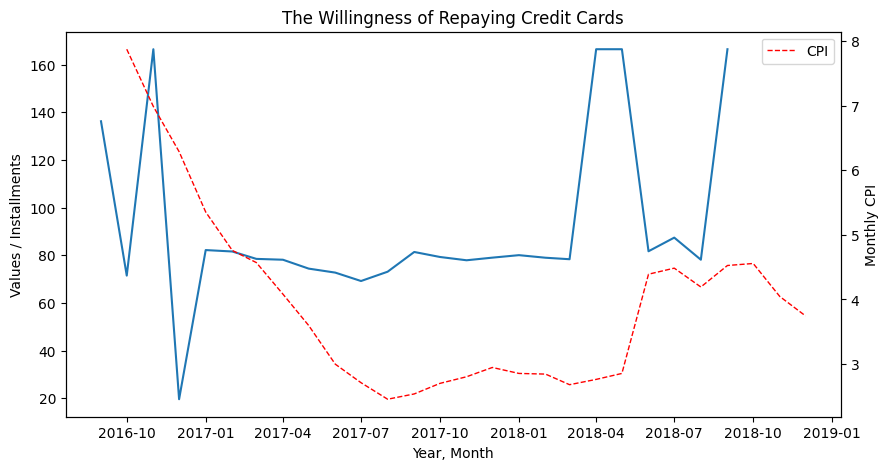

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 5))

sns.lineplot(data = monthly_istlm_idx)
ax1.set_xlabel('Year, Month')
ax1.set_ylabel('Values / Installments')

ax2 = ax1.twinx()
cpi_, = ax2.plot(df_brazcpi_1618.index[9:], df_brazcpi_1618.CPI.values[9:],
         color = 'red', label = 'CPI', linewidth = 1)
cpi_.set_linestyle('--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly CPI')

plt.title('The Willingness of Repaying Credit Cards')
plt.legend()
plt.show()

The willingness of using credit card has a positive correlation with CPI. When the price rises, people use more credit cards, repaying more in each installment; when the price lowers, people repay less in each installment.